In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\Dataset Football\\FullData.csv')
df.head(5)

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


In [7]:
del df['National_Position']
df.head(5)

,Name,Nationality,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,16,14,11,47,11,91,89,95,90,89


<AxesSubplot:xlabel='count', ylabel='Nationality'>

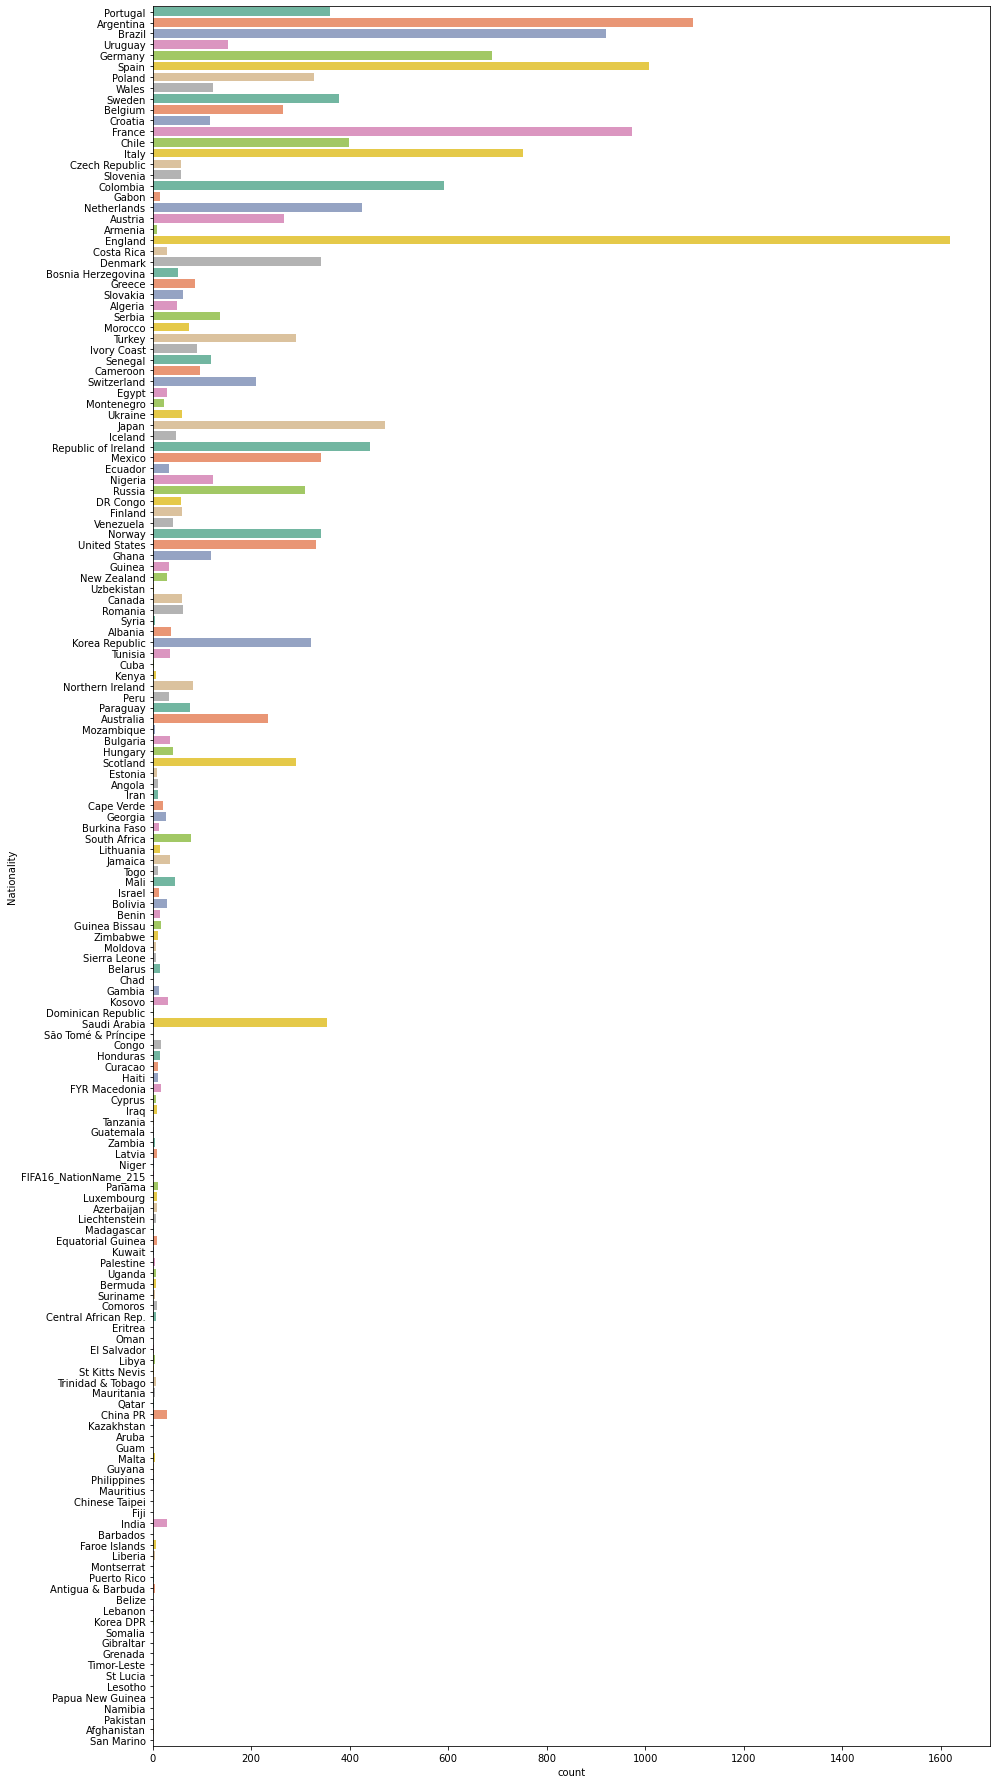

In [8]:
plt.figure(figsize=(15,32))

sns.countplot(y = df.Nationality, palette="Set2") ## plots all the nations on y-axis

<AxesSubplot:xlabel='Age', ylabel='count'>

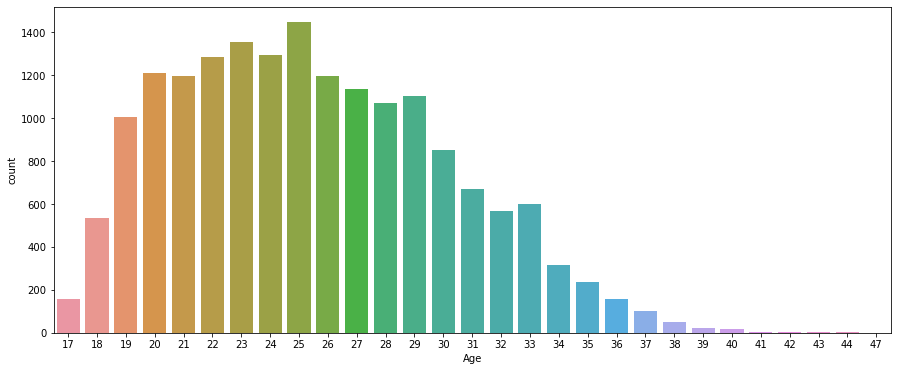

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(x="Age",data=df)

# Best Goal Keeper

In [11]:
## weights

a = 0.5
b = 1
c = 2
d = 3

In [13]:
## GoalKeeping Characteristics

df['gk_Shot_Stopper'] = (b*df.Reactions + b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)

df['gk_Sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking)/(2*a + 7*b + 0*c + 2*d)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Shot Stopping Score')

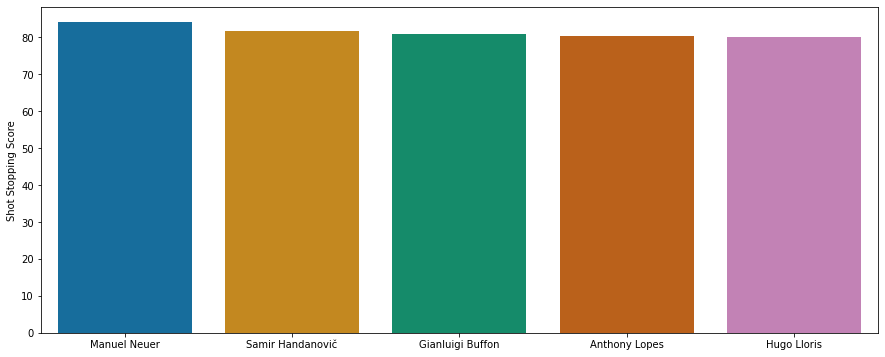

In [14]:
plt.figure(figsize=(15,6))

# Generate sequencial data and plot
sd1 = df.sort_values('gk_Shot_Stopper', ascending=False)[:5]
x1 = np.array(list(sd1['Name']))
y1 = np.array(list(sd1['gk_Shot_Stopper']))

sns.barplot(x1, y1, palette = "colorblind")
plt.ylabel("Shot Stopping Score")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sweeping Score')

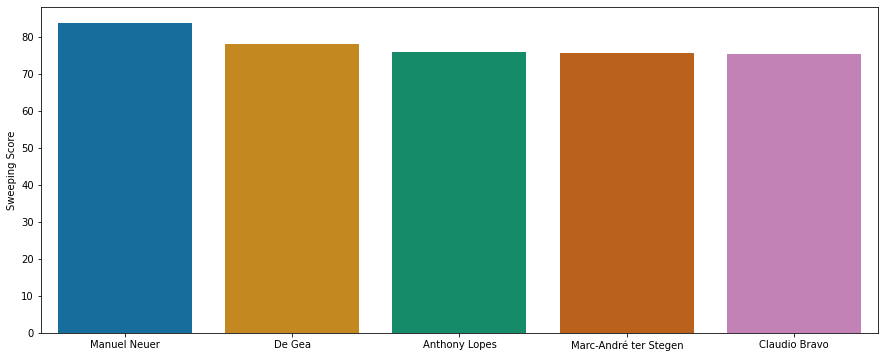

In [15]:
plt.figure(figsize=(15,6))

# Generate sequencial data and plot
sd2 = df.sort_values('gk_Sweeper', ascending=False)[:5]
x2 = np.array(list(sd2['Name']))
y2 = np.array(list(sd2['gk_Sweeper']))

sns.barplot(x2, y2, palette = "colorblind")
plt.ylabel("Sweeping Score")

# 4 Best Defenders

In [16]:
# Choosing Defenders

df['df_centre_backs'] = (d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision + b*df.Composure + b*df.Crossing + a*df.Short_Pass + b*df.Long_Pass + c*df.Acceleration + b*df.Speed 
                        + d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)

df['df_wb_Wing_Backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration + d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'LCB Score')

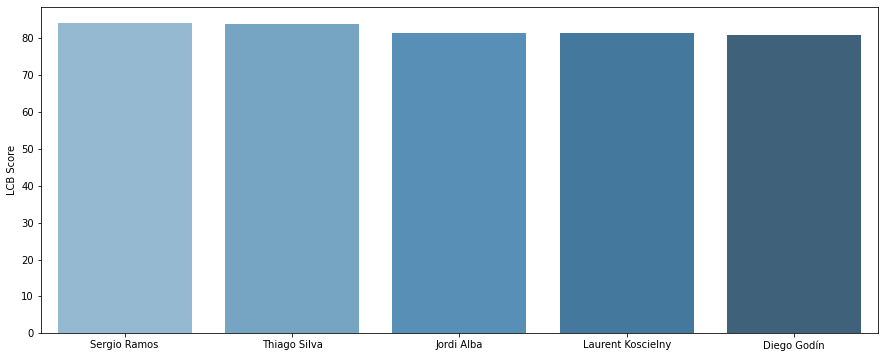

In [17]:
# plot Left central back

plt.figure(figsize=(15,6))

sd3 = df[(df['Club_Position'] == 'LCB')].sort_values('df_centre_backs', ascending=False)[:5]
x3 = np.array(list(sd3['Name']))
y3 = np.array(list(sd3['df_centre_backs']))
sns.barplot(x3, y3, palette=sns.color_palette("Blues_d"))
plt.ylabel("LCB Score")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'RCB Score')

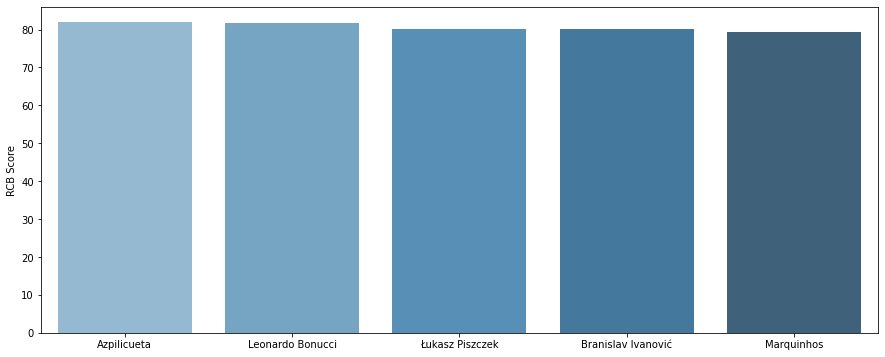

In [18]:
# plot Right central back

plt.figure(figsize=(15,6))

sd3 = df[(df['Club_Position'] == 'RCB')].sort_values('df_centre_backs', ascending=False)[:5]
x3 = np.array(list(sd3['Name']))
y3 = np.array(list(sd3['df_centre_backs']))
sns.barplot(x3, y3, palette=sns.color_palette("Blues_d"))
plt.ylabel("RCB Score")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Left Back Score')

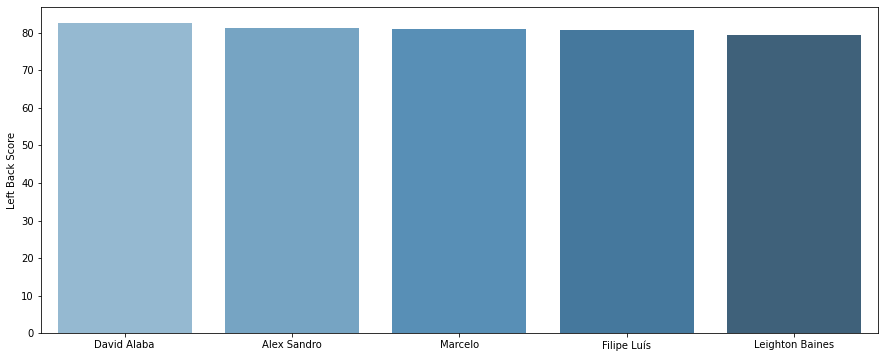

In [19]:
# plot Left central back

plt.figure(figsize=(15,6))

sd4 = df[(df['Club_Position'] == 'LWB') | (df['Club_Position'] == 'LB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd4['Name']))
y4 = np.array(list(sd4['df_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Left Back Score")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Right Back Score')

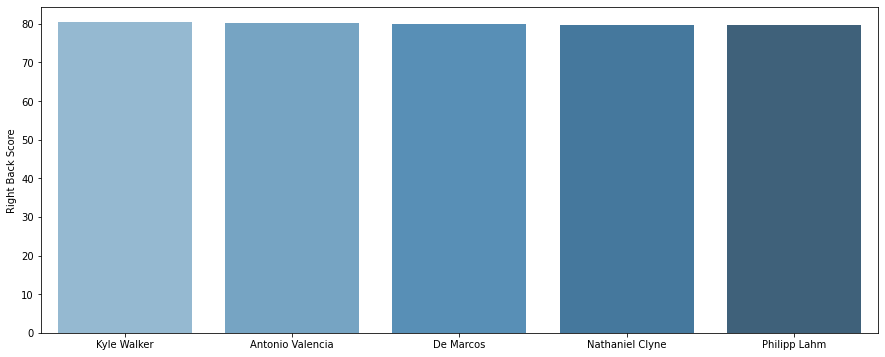

In [20]:
# plot Left central back

plt.figure(figsize=(15,6))

sd4 = df[(df['Club_Position'] == 'RWB') | (df['Club_Position'] == 'RB')].sort_values('df_wb_Wing_Backs', ascending=False)[:5]
x4 = np.array(list(sd4['Name']))
y4 = np.array(list(sd4['df_wb_Wing_Backs']))
sns.barplot(x4, y4, palette=sns.color_palette("Blues_d"))
plt.ylabel("Right Back Score")

# Best 3 Mid-Fielders

In [22]:
# Midfielding Indices

df['mf_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)
df['mf_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 1*b + 5*c + 5*d)

df['mf_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle)/(1*a + 4*b + 4*c + 4*d)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Controller Score')

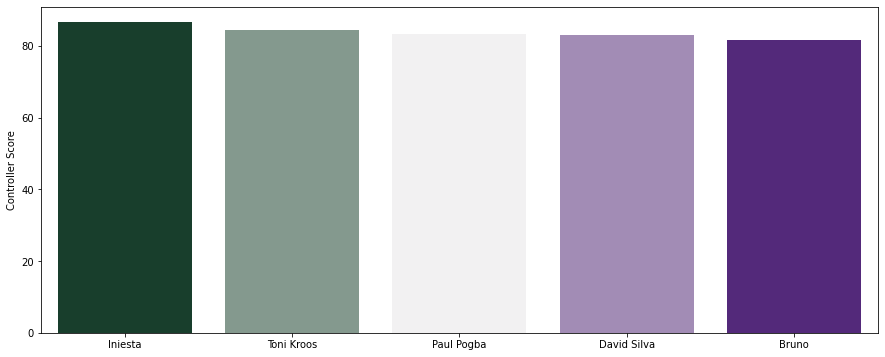

In [23]:
#  plot controller

plt.figure(figsize=(15,6))

# Generate some sequential data
ss = df[(df['Club_Position'] == 'LCM') | (df['Club_Position'] == 'LM')].sort_values('mf_controller', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['mf_controller']))
sns.barplot(x1, y1, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel('Controller Score')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'PlayMaker Score')

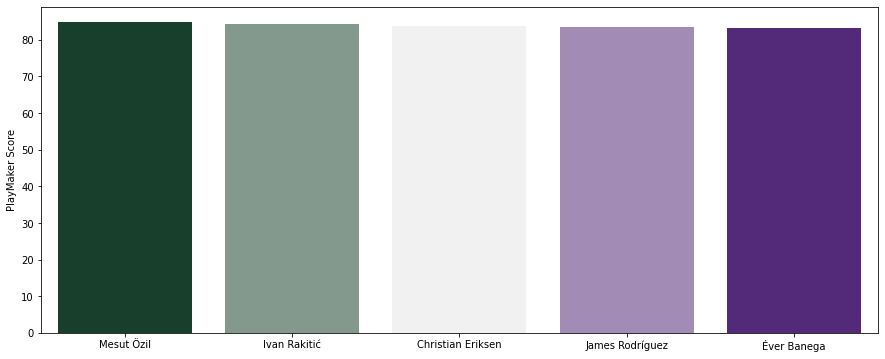

In [24]:
#  plot PlayMaker

plt.figure(figsize=(15,6))

# Generate some sequential data
ss2 = df[(df['Club_Position'] == 'CAM') | (df['Club_Position'] == 'LAM') | (df['Club_Position'] == 'RAM')].sort_values('mf_playmaker', ascending=False)[:5]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['mf_playmaker']))
sns.barplot(x2, y2, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel('PlayMaker Score')

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Beast Score')

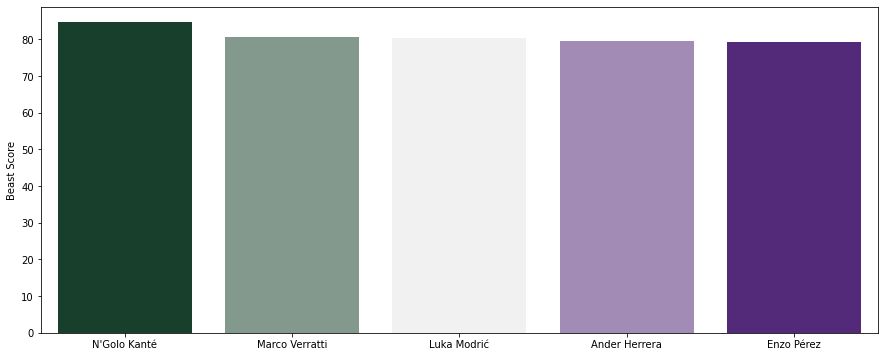

In [25]:
#  plot Beast

plt.figure(figsize=(15,6))

# Generate some sequential data
ss3 = df[(df['Club_Position'] == 'RCM') | (df['Club_Position'] == 'RM')].sort_values('mf_beast', ascending=False)[:5]
x3 = np.array(list(ss3['Name']))
y3 = np.array(list(ss3['mf_beast']))
sns.barplot(x3, y3, palette=sns.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel('Beast Score')

# Best 3 Attackers

In [27]:
# Attackers

df['att_left_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_right_wing'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_striker'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Left Wing')

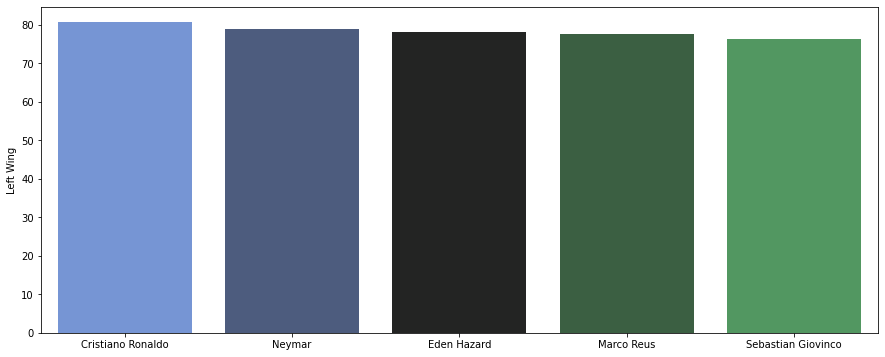

In [28]:
# plot LW

plt.figure(figsize=(15,6))

ss = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LS')].sort_values('att_left_wing', ascending=False)[:5]
x1 = np.array(list(ss['Name']))
y1 = np.array(list(ss['att_left_wing']))
sns.barplot(x1, y1, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Left Wing")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Right Wing')

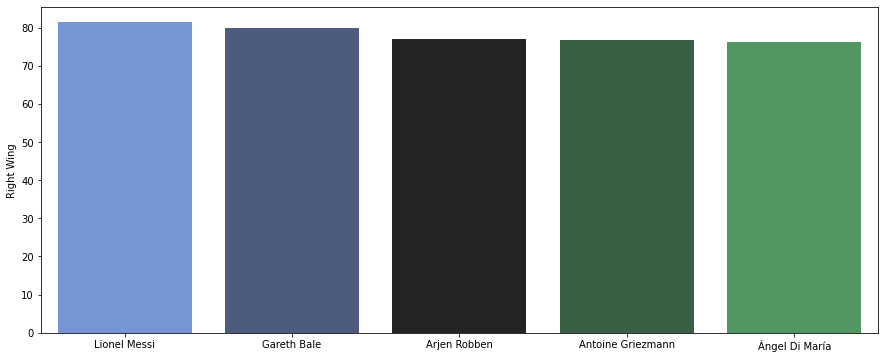

In [29]:
# plot RW

plt.figure(figsize=(15,6))

ss2 = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RS')].sort_values('att_right_wing', ascending=False)[:5]
x2 = np.array(list(ss2['Name']))
y2 = np.array(list(ss2['att_left_wing']))
sns.barplot(x2, y2, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Right Wing")

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Striker')

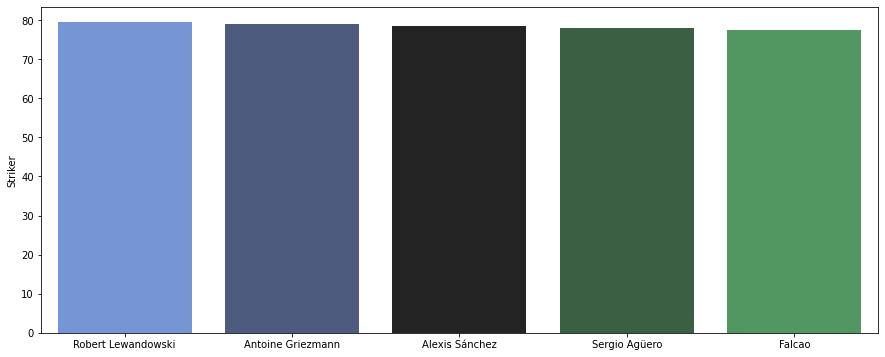

In [30]:
# Striker

plt.figure(figsize=(15,6))

ss3 = df[(df['Club_Position'] == 'ST') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'CF')].sort_values('att_striker', ascending=False)[:5]
x3 = np.array(list(ss3['Name']))
y3 = np.array(list(ss3['att_striker']))
sns.barplot(x3, y3, palette=sns.diverging_palette(255, 133, l=60, n=5, center="dark"))
plt.ylabel("Striker")